There are 2 NaN values in the dataset.


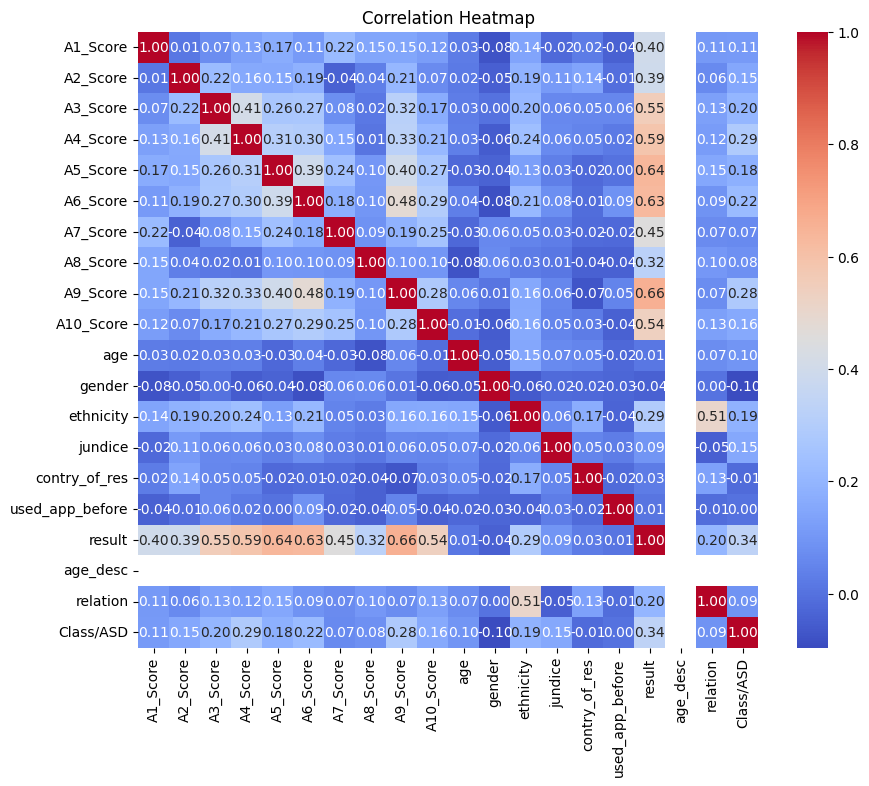

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy: 0.851063829787234
Decision Tree Accuracy: 0.8368794326241135
Random Forest Accuracy: 0.8297872340425532
SVM Accuracy: 0.8439716312056738
Naive Bayes Accuracy: 0.8014184397163121
KNN Accuracy: 0.8156028368794326
Gradient Boosting Machines Accuracy: 0.851063829787234
AdaBoost Accuracy: 0.8581560283687943


In [2]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load the dataset
Data = pd.read_csv('/content/autismnew1_screening.csv')

# Null value check
null_values = Data.isnull().sum()
nan_values = Data.isnull().sum().sum()
if nan_values == 0:
    print("No NaN values found in the dataset.")
else:
    print(f"There are {nan_values} NaN values in the dataset.")

# Fill null values in the "age" column with forward fill and constant
Data['age'].fillna(method='ffill', inplace=True)
Data['age'].fillna(0, inplace=True)
Data['age'] = Data['age'].astype(int)

# Fill NaN values in the "age" column with the mean of the column
mean_age = Data['age'].mean()
Data['age'].fillna(mean_age, inplace=True)

# Create a heatmap
correlation_matrix = Data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Select target variable and input features
target_df = Data['Class/ASD']
input_df = Data.drop(['Class/ASD'], axis=1)

# Feature extraction using RFE
model = LogisticRegression(solver='lbfgs')
n_features_to_select = 13
rfe = RFE(model, n_features_to_select=n_features_to_select)
fit = rfe.fit(input_df, target_df)
cols = input_df.columns[rfe.support_]
X1 = input_df[cols]

# Feature selection using SelectPercentile
selector = SelectPercentile(f_classif, percentile=80)
X_new = selector.fit_transform(X1, target_df)
colNames = list(X1.columns)
true = selector.get_support()
newcolindex = [i for i, a in enumerate(true) if a]
newcolname = list(colNames[i] for i in newcolindex)

# Create new dataset
X2 = input_df[newcolname]

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X2, target_df, test_size=0.2, random_state=42)

# Scaling the features
mm = MinMaxScaler()
x_train_scaled = mm.fit_transform(x_train)
x_test_scaled = mm.transform(x_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting Machines": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


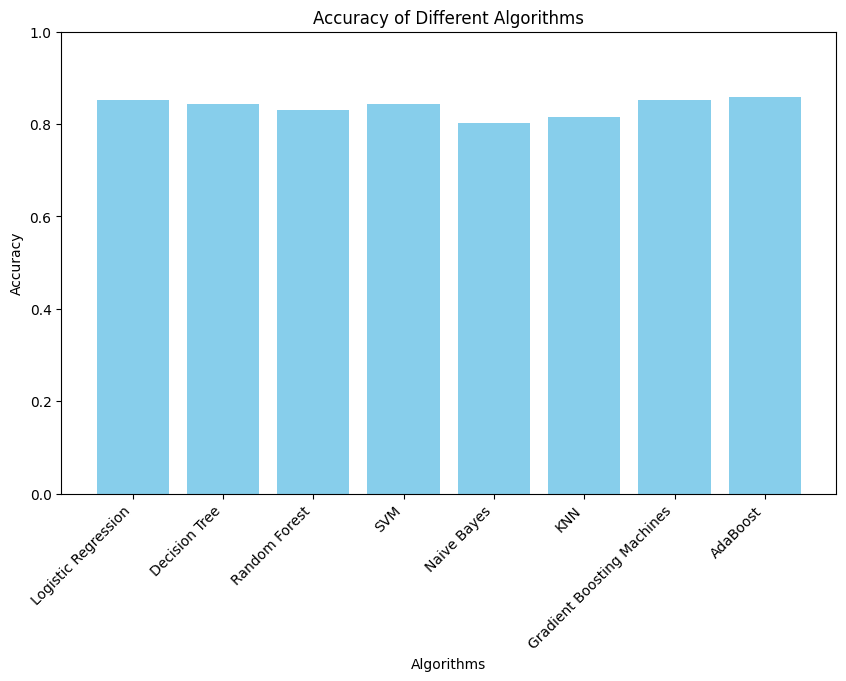

In [3]:
# Train and evaluate models, storing accuracies
accuracies = {}
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Setting y-axis limits between 0 and 1
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
